Importing the libraries

In [200]:
import pandas as pd 
import numpy as np #alglin


from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# data visualization
import seaborn as sns
sns.set(style="white")
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

Getting the data

In [201]:
train_df = pd.read_csv("dataset/train.csv")
test_df = pd.read_csv("dataset/test.csv")

Looking at the data

In [202]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [203]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Pandas_profiling provides a detailed report of the data but it is slow

In [204]:
#import pandas_profiling
#train_df.profile_report()

In [205]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [206]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

For a detailed explanation of the columns, check the README

In [207]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the first look on the data we can see that 38% survived of 891 passengers, age goes from 0.4 to 80, Pclass is categorical, most people are in classe 2 and 3.

In [208]:
pd.DataFrame(abs(train_df.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000000
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.077221
SibSp,0.035322
PassengerId,0.005007


Lets take a look at the correlations

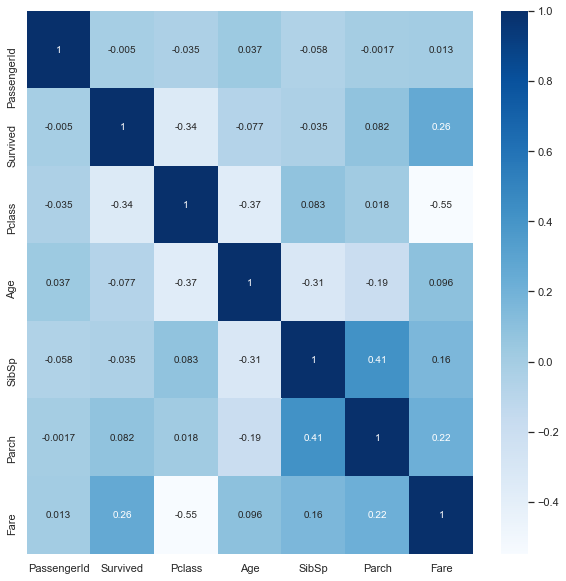

In [209]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(), annot=True, cmap="Blues")

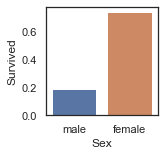

In [210]:
plt.figure(figsize=(2,2))
sns.barplot(x='Sex',y='Survived',data=train_df,ci=None)

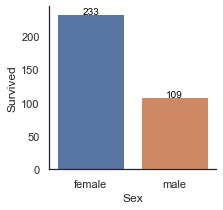

In [211]:
groupedvalues = train_df.groupby('Sex').sum().reset_index()

plt.figure(figsize=(3,3))
g=sns.barplot(x='Sex',y='Survived',data=groupedvalues,ci=None)

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.Survived,s=round(row.Survived,2), color='black', ha="center")

sns.despine()

70% of women survived compared to 20% of men

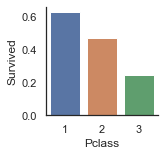

In [212]:
plt.figure(figsize=(2,2))
sns.barplot(x='Pclass', y='Survived', data=train_df,ci=None)
sns.despine()

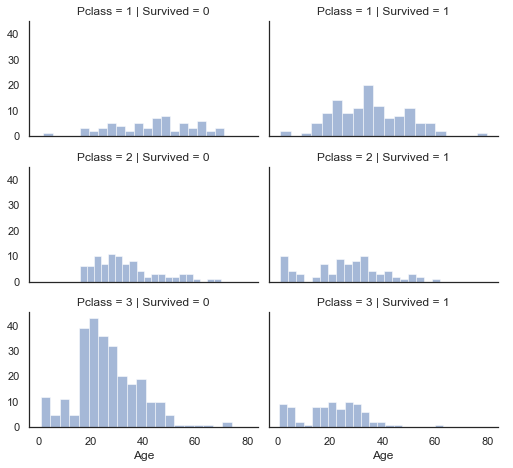

In [213]:
# Histogram for every Pclass, Age x Not Survived and Age x Survived
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

60% in the first Class survived, compared to 20% in third Class

I will combine the SibsP and Parch to 2 new features, familysize and alone

In [214]:
data = [train_df, test_df]
for dataset in data:
    dataset['familysize'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['familysize'] > 0, 'alone'] = 0
    dataset.loc[dataset['familysize'] == 0, 'alone'] = 1
    dataset['alone'] = dataset['alone'].astype(int)
train_df['alone'].value_counts()

1    537
0    354
Name: alone, dtype: int64

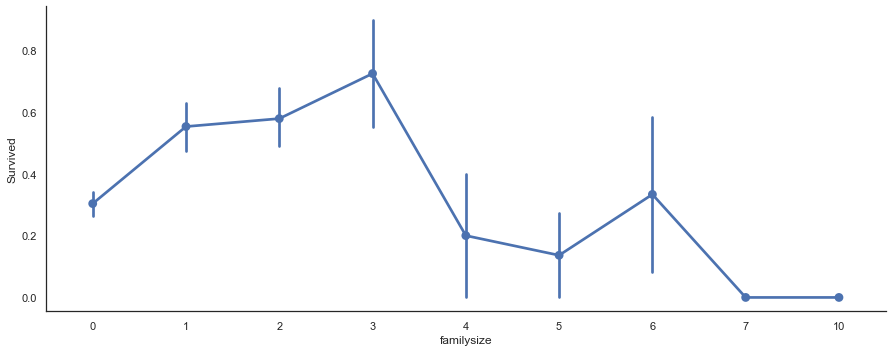

In [215]:
axes = sns.factorplot('familysize','Survived',data=train_df, aspect = 2.5, )

We can see that you had a high probabilty of survival with 1 to 3 relatives, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

In [216]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'familysize', 'alone'],
      dtype='object')

In [217]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'familysize', 'alone'],
      dtype='object')

Lets check the missing values

In [218]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
alone,0,0.0
familysize,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0


In [219]:
# create a new feature to extract title names from the Name column
train_df['Title'] = train_df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
test_df['Title'] = test_df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [220]:
# normalize the titles
standard_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}
# map the normalized titles to the current titles 
train_df.Title = train_df.Title.map(standard_titles)
# view value counts for the normalized titles
print(train_df.Title.value_counts())

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64


In [221]:
# group by Sex, Pclass, and Title 
grouped = train_df.groupby(['Sex','Pclass', 'Title'])  
# view the median Age by the grouped features 
grouped.Age.median()

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        40.0
                Officer    49.0
                Royalty    40.5
        2       Miss       24.0
                Mrs        31.5
        3       Miss       18.0
                Mrs        31.0
male    1       Master      4.0
                Mr         40.0
                Officer    51.0
                Royalty    40.0
        2       Master      1.0
                Mr         31.0
                Officer    46.5
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64

In [222]:
# apply the grouped median value on the Age NaN
train_df.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))
test_df.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

In [223]:
# fill Cabin NaN with U for unknown
train_df.Cabin = train_df.Cabin.fillna('U')
test_df.Cabin = test_df.Cabin.fillna('U')
# find most frequent Embarked value and store in variable
most_embarked = train_df.Embarked.value_counts().index[0]

# fill NaN with most_embarked value
train_df.Embarked = train_df.Embarked.fillna(most_embarked)
test_df.Embarked = test_df.Embarked.fillna(most_embarked)
# fill NaN with median fare
train_df.Fare = train_df.Fare.fillna(train_df.Fare.median())
test_df.Fare = test_df.Fare.fillna(train_df.Fare.median())
# view changes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  familysize   891 non-null    int64  
 13  alone        891 non-null    int32  
 14  Title        891 non-null    object 
dtypes: float64(2), int32(1), int64(6), object(6)
memory usage: 101.1+ KB


In [224]:
# map first letter of cabin to itself
train_df.Cabin = train_df.Cabin.map(lambda x: x[0])
test_df.Cabin = test_df.Cabin.map(lambda x: x[0])

One Hot Encoding

In [225]:
train_cat = train_df[['Sex', 'Embarked','Cabin','Title']]
test_cat = test_df[['Sex', 'Embarked','Cabin','Title']]
train_cat_encoded = pd.get_dummies(train_cat)
test_cat_encoded = pd.get_dummies(test_cat)

In [226]:
train_cat_encoded.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [227]:
train = train_df.join(train_cat_encoded)
test = test_df.join(test_cat_encoded)
train.drop(['Sex','Embarked','Cabin','Title'], axis=1, inplace=True)
test.drop(['Sex','Embarked','Cabin','Title'], axis=1, inplace=True)

Lets save the ids of the Passenger and drop the substituted columns and collinear columns

In [228]:
ids=test_df['PassengerId']

train.drop(['PassengerId','Ticket','Name','SibSp','Parch','alone'], axis=1, inplace=True)
test.drop(['PassengerId','Ticket','Name','SibSp','Parch','alone'], axis=1, inplace=True)

In [229]:
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
Title_Royalty,0,0.0
Cabin_B,0,0.0
Pclass,0,0.0
Age,0,0.0
Fare,0,0.0


In [230]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'familysize', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_A',
       'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G',
       'Cabin_T', 'Cabin_U', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Officer', 'Title_Royalty'],
      dtype='object')

In [231]:
test.columns

Index(['Pclass', 'Age', 'Fare', 'familysize', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_U',
       'Title_Col', 'Title_Dona', 'Title_Dr', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev'],
      dtype='object')

In [232]:
train.drop(['Title_Officer', 'Title_Royalty','Cabin_T'], axis=1, inplace=True)
test.drop(['Title_Col', 'Title_Dona', 'Title_Dr','Title_Ms', 'Title_Rev'], axis=1, inplace=True)

Data is ready for Machine Learing

In [233]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.2, random_state = 0)

In [234]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(decisiontree.score(x_val, y_val) * 100, 2)
print(acc_decisiontree)

78.21


In [235]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

y_prediction = random_forest.predict(x_val)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_val, y_val) * 100, 2)

print(acc_random_forest)

83.8


In [236]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train)

xgb.score(x_val, y_val)
acc_xgb = round(xgb.score(x_val, y_val) * 100, 2)

print(acc_xgb)

83.8


In [237]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)

y_pred = gbk.predict(x_val)
acc_gbk = round(gbk.score(x_val, y_val) * 100, 2)

print(acc_gbk)

82.12


Time to predict

In [238]:
predictions = xgb.predict(test)

Creating the submission

In [239]:
submission = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions.astype('int64') })
submission.to_csv('submission.csv', index=False)